In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [2]:
data=pd.read_csv('diabetes.csv')
data.head(5)
#data.isnull().sum()
#pd.read_csv? 'it helps to know about parameters of this function
#data.shape 'it  return total number of rows & col in the form (row , col)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#data.info() #not null means no row contain missing values 
data.isnull().sum() #getting missing values sum 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#data.isna().any() 

In [5]:
#It looks like null values are present in the form of zeros.
#It's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI equals to 0 .
#we have to replace these values with the mean of all non-zero values.
#lets see which coloumn has highest number of 0s , if there are less number of 0s then we can ignore that
#replace np.nan to visualize them
non_acceptable_zero = ["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in non_acceptable_zero:
    data[col].replace(0, np.nan, inplace=True)

#data.head(10) #to check 0 is replaced with NaN

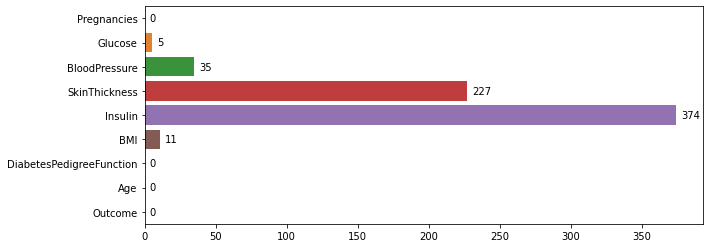

In [6]:
#plotting graph  to visualize NaN or Null data
plt.figure(figsize=(10,4))
bargraph = sns.barplot(x=data.isna().sum(),y=data.columns)
for p in bargraph.patches:
    bargraph.annotate(text=f"{p.get_width():.0f}", 
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', 
                ha="left", va="center",
               )
plt.show()

In [7]:
data.head(5) #before replacing 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
data.groupby('Outcome').mean() # calcuate mean for all row in value 0 & 1 ,
#after replacing mean run groupby again and you will see mean of insulin and other replacement will change drastically
#use can also use describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [9]:
#adding mean in place of NaN
for col in non_acceptable_zero:
    data[col].replace(np.nan, data[col].mean(), inplace=True)    


In [10]:
data.head(5) #after replacing 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [11]:
data.describe() #'give statistical measure like count , mean , min etc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data['Outcome'].value_counts() #count values of 0 and 1 in outcome , 1 is diabetes +

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
data.groupby('Outcome').mean() # calcuate mean for all row in value 0 & 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [14]:
#SPLITTING TEST AND TRAIN DATA
X = data.drop(columns='Outcome', axis=1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state=2)

#### Above all steps are genrally same for all algorithms till splitting test and train data

# Prediction Algorithms

### Random Forest Algorithm 
#### Method 1 - Using RandomForestClassifier

In [15]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier
RFClassifierModel = RandomForestClassifier()
RFClassifierModel.fit(X_train, Y_train)

RandomForestClassifier()

In [16]:
#ACCURACY
X_train_predict = RFClassifierModel.predict(X_train)
train_accuracy = accuracy_score(X_train_predict, Y_train)

X_test_predict = RFClassifierModel.predict(X_test)
test_accuracy = accuracy_score(X_test_predict, Y_test)

print('Training data Accuracy: ', train_accuracy*100 ,'%')
print('Test data Accuracy: ', test_accuracy*100 ,'%')

Training data Accuracy:  100.0 %
Test data Accuracy:  76.95167286245353 %


#### Method 2 - Using RandomForestRegressor

In [17]:
#Using Pipelining 
from sklearn.ensemble import RandomForestRegressor
RFRegressorModel = RandomForestRegressor()
RFRegressorModel.fit(X_train, Y_train)


RandomForestRegressor()

In [18]:
X_train_predict = RFRegressorModel.predict(X_train)
train_accuracy = accuracy_score( np.round(abs(X_train_predict)), Y_train )

X_test_predict = RFRegressorModel.predict(X_test)
test_accuracy = accuracy_score(np.round(abs(X_test_predict)) ,Y_test)

print('Training data Accuracy: ', train_accuracy*100 ,'%')
print('Test data Accuracy: ', test_accuracy*100 ,'%')

Training data Accuracy:  100.0 %
Test data Accuracy:  76.95167286245353 %


### Storing Both Models in Pickle File so that the trained model can be used directly

In [19]:
joblib.dump(RFClassifierModel,'RFClassifierDiabetes.pkl')


['RFClassifierDiabetes.pkl']

In [20]:
joblib.dump(RFRegressorModel ,'RFRegressorDiabetes.pkl')

['RFRegressorDiabetes.pkl']

### Making  Predictions

In [21]:
RFClassifierDiabetes=joblib.load('RFClassifierDiabetes.pkl')
RFRegressorDiabetes=joblib.load('RFRegressorDiabetes.pkl')
input_data = (6,148,72,35,155,33.6,0.627,50)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [22]:
PredictModelRFC = RFClassifierDiabetes.predict(input_data_reshaped)
PredictModelRFR = RFRegressorDiabetes.predict(input_data_reshaped)

print(PredictModelRFC[0])
if (PredictModelRFC[0]== 0):
  print('Not Diabetic')
else:
  print('Diabetic')

print(PredictModelRFR[0])
print('Possiblility : ',PredictModelRFR[0]*100 ,'%')


1
Diabetic
0.91
Possiblility :  91.0 %
